<a href="https://colab.research.google.com/github/Suvrakar/Data_visualization_python/blob/master/Untitled10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-plot
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#2.1 Get the file
downloaded = drive.CreateFile({'id':'11fLjbVrwrCtPUWP9IwitO-aT077Zin9e'}) # replace the id with id of file you want to access
downloaded.GetContentFile('Final.csv')

In [0]:
import pandas as pd
import matplotlib.pyplot as plt


dataset = pd.read_csv('Final.csv') 
dataset = dataset.dropna(axis = 0, how ='any')

In [0]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for Our Thesis', fontsize=15)
    plt.show()

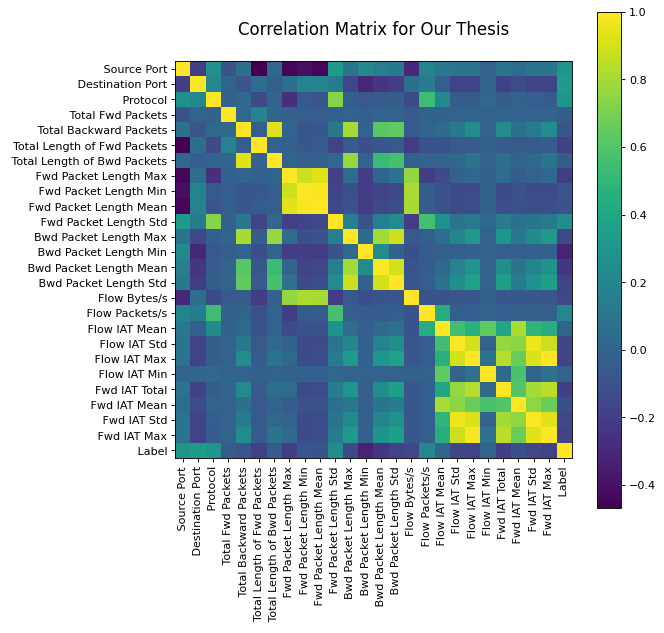

In [12]:
plotCorrelationMatrix(dataset, 8)